# **Assignment 4 **

In [13]:
######## Generic Modules ########
import timeit
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np

In [14]:
class LeNet(nn.Module):
    # Architecture of the Network
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) #change 1; 2 -> from 6 to 10; from 6 to 1
        self.pool1 = nn.AvgPool2d(2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.AvgPool2d(2,stride=2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        '''
        Parameters
        ----------
        x : Input Image 
            An Input image of size 28x28x1.
        Returns
        -------
        x : Output Tensor
            Flattened 1-Dimensional Tensor providing scores for 10 classes.
        '''
        x = self.pool1(F.sigmoid(self.conv1(x))) #change 3 -> from relu to sigmoid 
        x = self.pool2(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
######## User-Defined Module ########

#from Model import LeNet

class TrainTest:
    
    def __init__(self):
        self.transform = transforms.Compose(
                            [transforms.ToTensor(),
                              transforms.Normalize(0.5, 0.5),
                              transforms.Resize([28,28])])
    
        self.train_data = torchvision.datasets.MNIST(
                            root='/content/drive/MyDrive/Reduced MNIST Data/Reduced Trainging data',
                            train=True,
                            download=True,
                            transform=self.transform)
    
        self.test_data = torchvision.datasets.MNIST(
                            root='/content/drive/MyDrive/Reduced MNIST Data/Reduced Testing data',
                            train=False,
                            download=True,
                            transform=self.transform)
    
    
        self.trainloader = DataLoader(self.train_data, batch_size=256, shuffle=True)
        self.testloader = DataLoader(self.test_data, batch_size=256, shuffle=True)

        self.device = torch.device('cpu')
        self.model = LeNet().to(self.device)

    classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

    def train_test(self):
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr = 1e-1, momentum=0.9)
        self.epochs = 30
        
        #Training Loop
        for epoch in range(self.epochs):
            running_loss = 0.0
            for i, (images, labels) in enumerate(self.trainloader, 0):
                images = images.to(self.device)       
                labels = labels.to(self.device)
                self.optimizer.zero_grad()
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                
                running_loss += loss.item()
                if i % 32==31:             
                    print('[%d / %5f] Loss: %.3f' % (epoch+1, i+1, running_loss / 32))
                    running_loss = 0.0
                    
        correct = 0
        total = 0 
        correct_pred = { classname:0 for classname in self.classes}
        total_pred = { classname:0 for classname in self.classes}
        #Testing Loop
        with torch.no_grad():
            for images, labels in self.testloader:
                images =  images.to(self.device)
                labels = labels.to(self.device)
                outputs = self.model(images)
                _, predictions = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predictions == labels).sum().item()
                    
                for label, prediction in zip(labels, predictions):
                    if label == prediction:
                        correct_pred[self.classes[label]] += 1
                    total_pred[self.classes[label]] += 1
                    
            # print accuracy for each class
            for classname, correct_count in correct_pred.items():
                accuracy = 100 * float(correct_count) / total_pred[classname]
                print('Accuracy for class {} is : {:.1f}'.format(classname,accuracy))     
        
        return 'Accuracy of the network on the 10000 test images: %d %%' % (100.0 * correct / total)

    def visualize(self):    
        self.testloader = DataLoader(self.test_data, batch_size=4, shuffle=True)
        def imshow(img):
            img = img / 2 + 0.5 #unnormalize
            npimg = img.numpy()
            print(npimg.shape)
            plt.imshow(np.transpose(npimg, (1, 2, 0)))
            plt.show()
    
        dataiter = iter(self.testloader)
        images, labels = dataiter.next()
        #print images
        imshow(torchvision.utils.make_grid(images))
        print('Ground Truth Label :',' '.join('%5s' % self.classes[labels[j]] for j in range(4)))
        outputs = self.model(images.to(self.device))
        _, predicted = torch.max(outputs,1) # axis or dim =1 representing column i.e classes
        print('Predicted Label    :', ' '.join('%5s' % self.classes[predicted[j]] for j in range(4)))  
            
    
    
    

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1 / 32.000000] Loss: 2.319
[1 / 64.000000] Loss: 2.322
[1 / 96.000000] Loss: 2.313
[1 / 128.000000] Loss: 2.307
[1 / 160.000000] Loss: 2.309
[1 / 192.000000] Loss: 2.309
[1 / 224.000000] Loss: 2.305
[2 / 32.000000] Loss: 2.306
[2 / 64.000000] Loss: 2.308
[2 / 96.000000] Loss: 2.304
[2 / 128.000000] Loss: 2.303
[2 / 160.000000] Loss: 2.305
[2 / 192.000000] Loss: 2.304
[2 / 224.000000] Loss: 2.305
[3 / 32.000000] Loss: 2.305
[3 / 64.000000] Loss: 2.304
[3 / 96.000000] Loss: 2.304
[3 / 128.000000] Loss: 2.303
[3 / 160.000000] Loss: 2.303
[3 / 192.000000] Loss: 2.302
[3 / 224.000000] Loss: 2.303
[4 / 32.000000] Loss: 2.302
[4 / 64.000000] Loss: 2.303
[4 / 96.000000] Loss: 2.303
[4 / 128.000000] Loss: 2.302
[4 / 160.000000] Loss: 2.304
[4 / 192.000000] Loss: 2.303
[4 / 224.000000] Loss: 2.302
[5 / 32.000000] Loss: 2.303
[5 / 64.000000] Loss: 2.303
[5 / 96.000000] Loss: 2.302
[5 / 128.000000] Loss: 2.303
[5 / 160.000000] Loss: 2.303
[5 / 192.000000] Loss: 2.302
[5 / 224.000000] Loss: 2.302


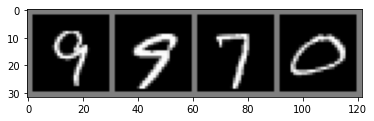

Ground Truth Label :     9     9     7     0
Predicted Label    :     9     9     7     0
Time of Testing:  0.16398681800001214


In [16]:
#

start = timeit.default_timer()
training = TrainTest()
print(training.train_test())
stop = timeit.default_timer()

print('Time of Training: ', stop - start)  


start = timeit.default_timer()
training.visualize()
stop = timeit.default_timer()

print('Time of Testing: ', stop - start) 

#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored